

# Project: Investigate TMDb movie dataset


## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

 I will be analyzing TMDb movie dataset and figure out what are the genre trends over the years? Also I be answering following questions.
 1. What is the Average Revenue Trend by genres? Which Genre has the most average revenue and which has least?
 2. What is the rating trends of Genres?
 3. What are the highest budgeted Genres on average?
 4. what genre is most popular?
 5. Is their a correlation between budget and popularity, if yes is it positive or negative and how strong is the correlation?
 6. Do movies with huge budget have more ratings than the movies with less budget?
 
The data set has 21 columns and 10866 rows, which includes movie budget, revenues, popularity, ratings etc. Lets explore data and dig into analysis thereafter. 


In [1]:
# importing packages 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.float_format = '{:.2f}'.format

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In this section, we will load data and perform following actions
 - Loading data
 - Check for missing values
 - Drop Extraneous Columns
 - Check duplicate rows, 
 - drop duplicate rows and extraneous columns
 - Check data types of each column and convert them to desired data types
 - Uniques Values count
 - handling multivalues

**Loading Data**

In [2]:
#Loading Data
df_tmbd = pd.read_csv("tmdb-movies.csv")
df_tmbd.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47



**Check for the missing**

In [3]:
df_tmbd.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

**Following Columns have missing values**
 - imdb_id
 - cast
 - homepage
 - director
 - tagline
 - keywords
 - overview
 - genres
 - production_companies
 
Since above columns have missing values and most of them are extraneous for my data analysis and I will not be using them in any data analysis ahead. That's why I will drop all extraneous columns including above mentioned columns except for __genres__ column. __genres__ column has only 23 missing valuse and it will be used in data analysis that's why I will only drop the rows having those missing values.

**Droping extraneous columns**

In [4]:
df_tmbd.drop(['id','original_title','imdb_id','cast','homepage','director','overview','tagline','keywords','production_companies'], axis = 1, inplace = True)

In [5]:
df_tmbd.isnull().sum()

popularity       0
budget           0
revenue          0
runtime          0
genres          23
release_date     0
vote_count       0
vote_average     0
release_year     0
budget_adj       0
revenue_adj      0
dtype: int64

**Drop rows containing missing values in genres column**

In [6]:
df_tmbd.dropna(inplace=True, axis = 0)

In [7]:
df_tmbd.isnull().sum()

popularity      0
budget          0
revenue         0
runtime         0
genres          0
release_date    0
vote_count      0
vote_average    0
release_year    0
budget_adj      0
revenue_adj     0
dtype: int64

**Number of duplicate rows**

In [8]:
df_tmbd.duplicated().sum()

1

**drop duplicates**

In [9]:
df_tmbd.drop_duplicates(inplace = True)

# Number of duplicate rows
df_tmbd.duplicated().sum()

0

**check data types**

In [10]:
df_tmbd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 11 columns):
popularity      10842 non-null float64
budget          10842 non-null int64
revenue         10842 non-null int64
runtime         10842 non-null int64
genres          10842 non-null object
release_date    10842 non-null object
vote_count      10842 non-null int64
vote_average    10842 non-null float64
release_year    10842 non-null int64
budget_adj      10842 non-null float64
revenue_adj     10842 non-null float64
dtypes: float64(4), int64(5), object(2)
memory usage: 1016.4+ KB


**convert data types**

In [11]:
#Converting Release_date to datetime format
df_tmbd['release_date'] = pd.to_datetime(df_tmbd['release_date'], format = '%m/%d/%y')
df_tmbd.release_date.dtype

dtype('<M8[ns]')

In [12]:
df_tmbd['budget_adj'] = df_tmbd['budget_adj'].astype(int)
df_tmbd['budget_adj'] = df_tmbd['revenue_adj'].astype(int)
df_tmbd.info()
df_tmbd.revenue.min()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10842 entries, 0 to 10865
Data columns (total 11 columns):
popularity      10842 non-null float64
budget          10842 non-null int64
revenue         10842 non-null int64
runtime         10842 non-null int64
genres          10842 non-null object
release_date    10842 non-null datetime64[ns]
vote_count      10842 non-null int64
vote_average    10842 non-null float64
release_year    10842 non-null int64
budget_adj      10842 non-null int32
revenue_adj     10842 non-null float64
dtypes: datetime64[ns](1), float64(3), int32(1), int64(5), object(1)
memory usage: 974.1+ KB


0

In [13]:
df_tmbd.head()

,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000,1513528810,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,1392445892,1392445892.52
1,28.42,150000000,378436354,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.10,2015,348161292,348161292.49
2,13.11,110000000,295238201,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.30,2015,271619025,271619025.41
3,11.17,200000000,2068178225,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.50,2015,1902723129,1902723129.80
4,9.34,190000000,1506249360,137,Action|Crime|Thriller,2015-04-01,2947,7.30,2015,1385748801,1385748801.47


### Descriptive Statistics

In [14]:
df_tmbd.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10842.00,10842.00,10842.00,10842.00,10842.00,10842.00,10842.00,10842.00,10842.00
mean,0.65,14655309.27,39911384.05,102.14,217.82,5.97,2001.31,49736552.35,51477974.92
std,1.00,30939713.61,117117936.32,31.29,576.18,0.93,12.81,142719893.49,144772307.64
min,0.00,0.00,0.00,0.00,10.00,1.50,1960.00,-2147483648.00,0.00
25%,0.21,0.00,0.00,90.00,17.00,5.40,1995.00,0.00,0.00
50%,0.38,0.00,0.00,99.00,38.00,6.00,2006.00,0.00,0.00
75%,0.72,15000000.00,24141183.50,111.00,146.00,6.60,2011.00,33733300.25,33878383.70
max,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,1907005841.00,2827123750.41


We noticed that the minimum value of budget and revenue is zero, which indicated that those missing are replaced with zero in these two columns. To remove these missing values, we will replace all zero with the mean of the column in budget and revenue.

**Replacing zero with mean of the existing values of budget and revenue column**

In [15]:
df_tmbd['budget'].replace({0: df_tmbd['budget'].mean()}, inplace=True)
df_tmbd['revenue'].replace({0: df_tmbd['revenue'].mean()}, inplace=True)

In [16]:
# Number of unique values
df_tmbd.nunique()

popularity      10791
budget            557
revenue          4702
runtime           246
genres           2039
release_date     5904
vote_count       1289
vote_average       72
release_year       56
budget_adj       4828
revenue_adj      4840
dtype: int64

In [17]:
df_tmbd.head()

,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000.00,1513528810.00,124,Action|Adventure|Science Fiction|Thriller,2015-06-09,5562,6.50,2015,1392445892,1392445892.52
1,28.42,150000000.00,378436354.00,120,Action|Adventure|Science Fiction|Thriller,2015-05-13,6185,7.10,2015,348161292,348161292.49
2,13.11,110000000.00,295238201.00,119,Adventure|Science Fiction|Thriller,2015-03-18,2480,6.30,2015,271619025,271619025.41
3,11.17,200000000.00,2068178225.00,136,Action|Adventure|Science Fiction|Fantasy,2015-12-15,5292,7.50,2015,1902723129,1902723129.80
4,9.34,190000000.00,1506249360.00,137,Action|Crime|Thriller,2015-04-01,2947,7.30,2015,1385748801,1385748801.47


**We see the __genres__ columns has multiple values. we will fix them and seperate them into single values**

In [18]:
df_tmbd = (df_tmbd.drop('genres', axis=1).join(df_tmbd['genres']
                                               .str.split('|', expand = True).stack().reset_index(level=1, drop=True)
                                               .rename('genres')).loc[:,df_tmbd.columns])

In [19]:
df_tmbd.head()

,popularity,budget,revenue,runtime,genres,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.99,150000000.00,1513528810.00,124,Action,2015-06-09,5562,6.50,2015,1392445892,1392445892.52
0,32.99,150000000.00,1513528810.00,124,Adventure,2015-06-09,5562,6.50,2015,1392445892,1392445892.52
0,32.99,150000000.00,1513528810.00,124,Science Fiction,2015-06-09,5562,6.50,2015,1392445892,1392445892.52
0,32.99,150000000.00,1513528810.00,124,Thriller,2015-06-09,5562,6.50,2015,1392445892,1392445892.52
1,28.42,150000000.00,378436354.00,120,Action,2015-05-13,6185,7.10,2015,348161292,348161292.49


In [20]:
df_tmbd.shape

(26955, 11)

<a id='eda'></a>
## Exploratory Data Analysis

#### lets figure out if following trends
 - Average Revenue by genres Trend
 - Ratings Trends of genres
 - Highest Rated genres
 - budget and popularity correlation
 - budget and vote_average correlation

**1. What is the Average Revenue Trend by genres? Which Genre has the most average revenue and which has least?**

In [21]:
genres_revenue = df_tmbd.groupby('genres')['revenue'].mean()
genres_revenue = genres_revenue
genres_revenue

genres
Action             91612012.07
Adventure         130176847.60
Animation         101635260.27
Comedy             58802492.68
Crime              59494595.27
Documentary        34123719.56
Drama              50076730.67
Family             95712115.24
Fantasy           116138634.97
Foreign            34850711.41
History            53640417.51
Horror             43056558.92
Music              50288257.07
Mystery            59926892.12
Romance            55158097.14
Science Fiction    91021778.49
TV Movie           39923890.73
Thriller           62102856.46
War                67265235.44
Western            52757426.89
Name: revenue, dtype: float64

Text(0.5, 1.0, 'Average Revenue by genres')

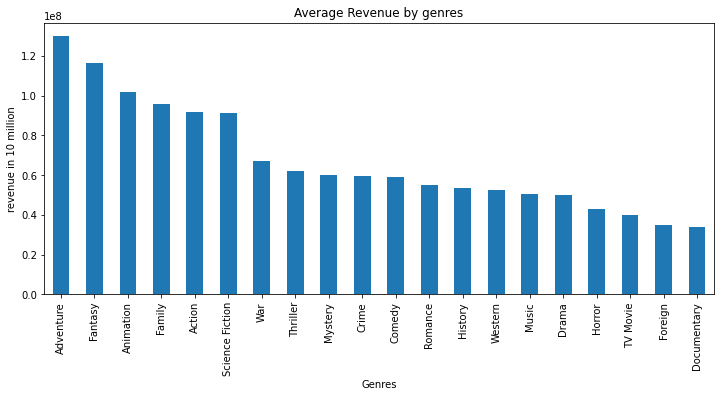

In [22]:
genres_revenue.sort_values(ascending = False).plot(kind='bar', figsize=(12,5));
plt.xlabel('Genres')
plt.ylabel('revenue in 10 million')
plt.title('Average Revenue by genres')

>As we can see in from the above bar graph that __Adventure__ has the highest average revenue while Documentary has lowes

**2. What is the rating trends of Genres?**

In [23]:
genres_ratings = df_tmbd.groupby('genres')['vote_average'].mean()
genres_ratings = genres_ratings
genres_ratings

genres
Action            5.79
Adventure         5.94
Animation         6.40
Comedy            5.91
Crime             6.12
Documentary       6.91
Drama             6.17
Family            6.00
Fantasy           5.86
Foreign           5.98
History           6.41
Horror            5.34
Music             6.48
Mystery           5.95
Romance           6.04
Science Fiction   5.67
TV Movie          5.79
Thriller          5.75
War               6.30
Western           6.08
Name: vote_average, dtype: float64

Text(0.5, 1.0, 'Rating Trends of Genres')

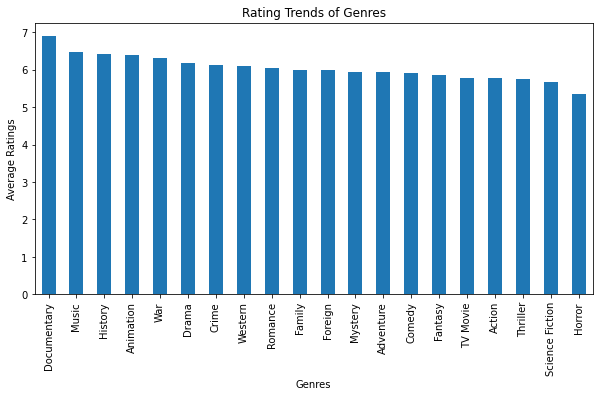

In [24]:
genres_ratings.sort_values(ascending=False).plot(kind = 'bar', figsize = (10,5));
plt.xlabel('Genres')
plt.ylabel('Average Ratings')
plt.title('Rating Trends of Genres')

> We can see that the average rating trend for genres is 5 and 7. Documentary has the highest average ratings while Horror has the lowest

**3. What are the highest budgeted genres**

In [25]:
genres_budget = df_tmbd.groupby('genres')['budget'].mean()
genres_budget = genres_budget
genres_budget

genres
Action            33604697.71
Adventure         43172688.23
Animation         32363902.88
Comedy            21230251.48
Crime             23411193.46
Documentary       13428728.05
Drama             19405418.58
Family            31788223.66
Fantasy           39140277.69
Foreign           13378362.15
History           25220523.19
Horror            14033144.78
Music             18023477.83
Mystery           22813670.59
Romance           19816124.76
Science Fiction   31268858.96
TV Movie          14133166.85
Thriller          23590088.52
War               27133962.27
Western           27056733.09
Name: budget, dtype: float64

Text(0.5, 1.0, 'Genre By average Budget')

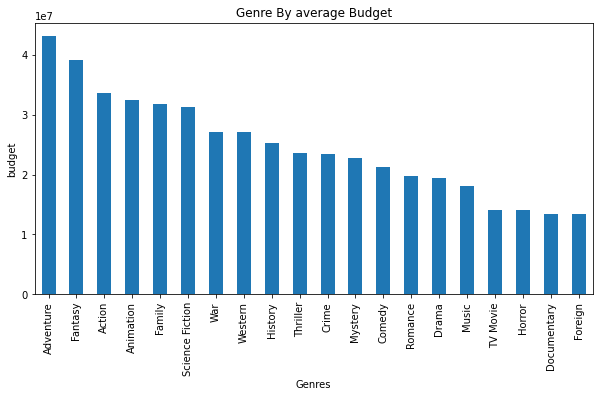

In [26]:
genres_budget.sort_values(ascending = False).plot(kind='bar', figsize = (10,5));
plt.xlabel('Genres')
plt.ylabel('budget')
plt.title('Genre By average Budget')

> Adventure movies are of the highest budget while Foreign genre movies have lowest average budget.

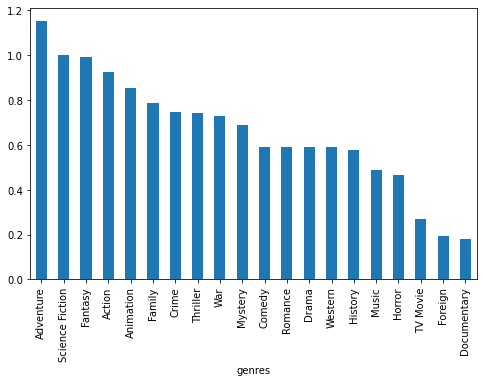

In [27]:
genre_popularity = df_tmbd.groupby('genres')['popularity'].mean()
genre_popularity = genre_popularity
genre_popularity.sort_values(ascending=False).plot(kind='bar', figsize=(8,5));

> Adventure movies are more popular

Text(0.5, 1.0, 'Comparison of Budget and revenue')

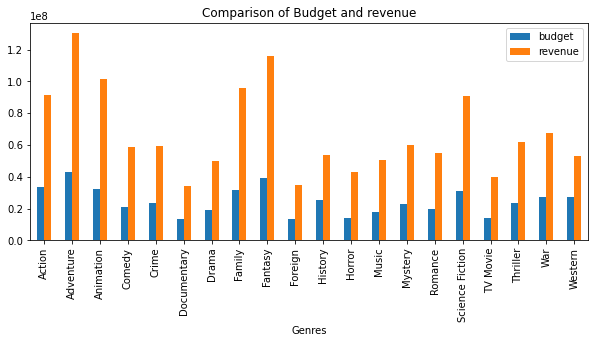

In [28]:
pd.concat([genres_budget,genres_revenue],axis=1).plot(kind='bar', figsize=(10,4));
plt.xlabel('Genres')
plt.title('Comparison of Budget and revenue')

> We compared budget and revenue, and we can say that more budget will generate more revenues.

In [29]:
def scatter_plot(x,y,title):
    df_tmbd.plot(x=x, y=y, kind='scatter',fontsize=8)
    plt.title(title)

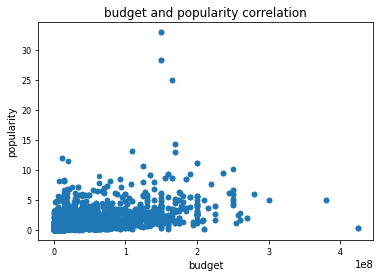

In [30]:
scatter_plot("budget","popularity","budget and popularity correlation")

> we don't see any strong correlation between popularity and budget.

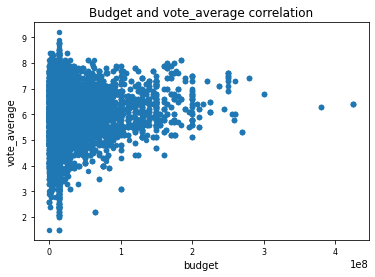

In [31]:
scatter_plot('budget','vote_average', 'Budget and vote_average correlation')

> It is hard to say if budget and vote_average are correlation from the given scatter plot.

<a id='conclusions'></a>
## Conclusions
We have particularly focused on Genre trends while also tried to extract if any of the variables have a correlation. From the visualization, we can confidently say that Adventure movies generate the highest revenue while documentaries generate lowest, but it is interesting that documentaries have the highest average ratings. If we see the highest budgeted genres then that is adventure genres. We have also compared budget and revenue and visualized and saw that movies with more budget are likely to generate more revenue.

We have alos checked the correlation between multiple columns. We compared popularity and budget and we cannot say that they are even correlated and same goes for budget and vote_average.

## Limitations
In this analysis we have seen more missing values for budget and revenue values. To accommodate those missing values we have used the mean of the existing values, which can affect the findings as those missing values may vary from the existing values but to extract the best findings possible, we need to replace the missing values with the mean.

In [32]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0